# Introduction

Develop a robust machine learning model to accurately predict company bankruptcies. By utilizing this model, the institution aims to improve risk assessment, make informed lending decisions, and optimize their financial portfolio management.

# Company Bankruptcy

Company bankruptcy occurs when a company cannot pay its debts and obligations to creditors, resulting in the company's assets being liquidated to repay those debts. This can lead to the company ceasing operations and potentially going out of business.

# Imported Required Libiaries

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Data set

In [11]:
#load the data set
df= pd.read_csv("C:\\Users\\ragul\\project\\Bankruptcies.csv")

In [13]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

# Exploratory Data Analysis (EDA)

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends. Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variable.Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contribute Cancelation predection.

In [17]:
# check the first 5 rows
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [18]:
# check the last 5 rows
df.tail(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [21]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

#### Rename the correceted columns and adjust the line space in column

In [26]:
df.rename(columns={'Bankrupt?' : 'Bankrupt'},inplace=True)

In [28]:
# white spaces from the column names of a Pandas DataFrame
df.columns = df.columns.str.strip()

used to remove leading and trailing white spaces from the column names of a Pandas DataFrame

In [31]:
{column:len(df[column].unique()) for column in df.columns }

{'Bankrupt': 2,
 'ROA(C) before interest and depreciation before interest': 3333,
 'ROA(A) before interest and % after tax': 3151,
 'ROA(B) before interest and depreciation after tax': 3160,
 'Operating Gross Margin': 3781,
 'Realized Sales Gross Margin': 3788,
 'Operating Profit Rate': 3376,
 'Pre-tax net Interest Rate': 3789,
 'After-tax net Interest Rate': 3604,
 'Non-industry income and expenditure/revenue': 2551,
 'Continuous interest rate (after tax)': 3617,
 'Operating Expense Rate': 2966,
 'Research and development expense rate': 1536,
 'Cash flow rate': 5557,
 'Interest-bearing debt interest rate': 1080,
 'Tax rate (A)': 2488,
 'Net Value Per Share (B)': 2278,
 'Net Value Per Share (A)': 2285,
 'Net Value Per Share (C)': 2284,
 'Persistent EPS in the Last Four Seasons': 1358,
 'Cash Flow Per Share': 1545,
 'Revenue Per Share (Yuan ¥)': 3807,
 'Operating Profit Per Share (Yuan ¥)': 1236,
 'Per Share Net profit before tax (Yuan ¥)': 1522,
 'Realized Sales Gross Profit Growth Rat

# Checking the duplicated & Null Values

Before moving further with the analysis, it is essential to ensure the integrity of our dataset. We will begin by examining for any missing values and identifying potential duplicate.This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning detectiont

In [35]:
df.duplicated().sum()

0

In [36]:
df.isna().sum()

Bankrupt                                                   0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt                                                 6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

Our dataset does not have any null values and duplicates.Now we can proceed with confidence, knowing that our dataset is ready for further analysis.

# Data Visualization

#### 1. Density plot for ROA(C)

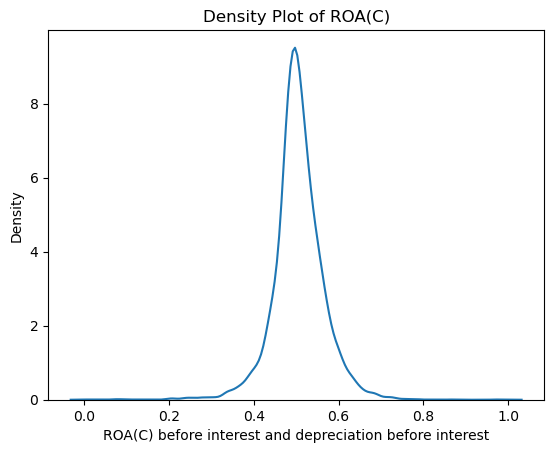

In [44]:
# Density plot
sns.kdeplot(df['ROA(C) before interest and depreciation before interest'])
plt.title('Density Plot of ROA(C)')
plt.show()

This indicates that there are some companies with very high ROA(C) values, while the majority of companies have lower values.The peak of the distribution is around 0.2, suggesting that this is the most common range of ROA(C) values in the dataset.

#### 2.Density plot for ROA(B)

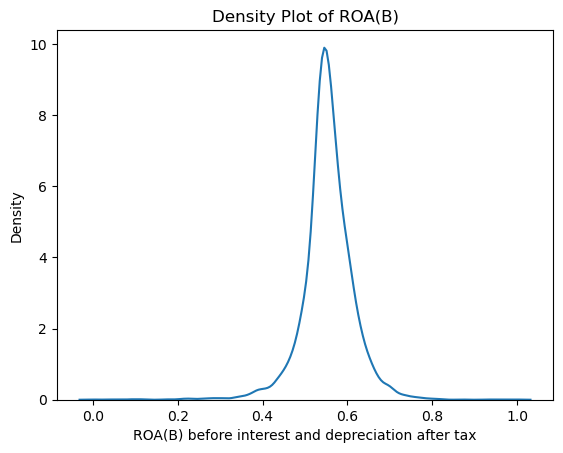

In [48]:
# Density plot
sns.kdeplot(df['ROA(B) before interest and depreciation after tax'])
plt.title('Density Plot of ROA(B)')
plt.show()

This indicates that there are some companies with very high ROA(B) values, while the majority of companies have lower values.The peak of the distribution is around 0.2, suggesting that this is the most common range of ROA(B) values in the dataset.

#### 3.Density plot for ROA(A

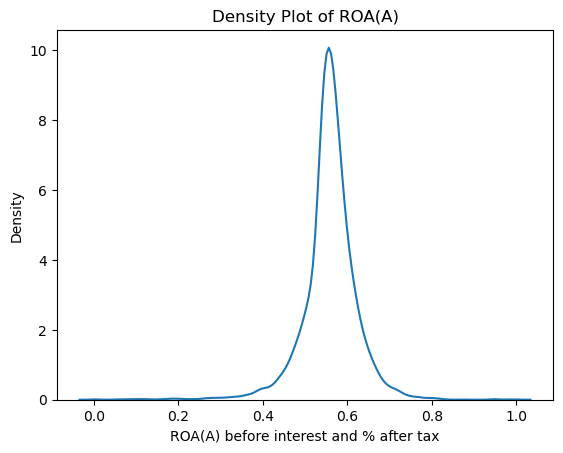

In [52]:
# Density plot
sns.kdeplot(df['ROA(A) before interest and % after tax'])
plt.title('Density Plot of ROA(A)')
plt.show()

This indicates that there are some companies with very high ROA(A) values, while the majority of companies have lower values.The peak of the distribution is around 0.2, suggesting that this is the most common range of ROA(A) values in the dataset.

# Understanding Financial Metrics of Bankrupt companies

#### 1.Distribution of "Operating Profit Per Share (Yuan ¥)" for bankrupt vs. non-bankrupt companies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


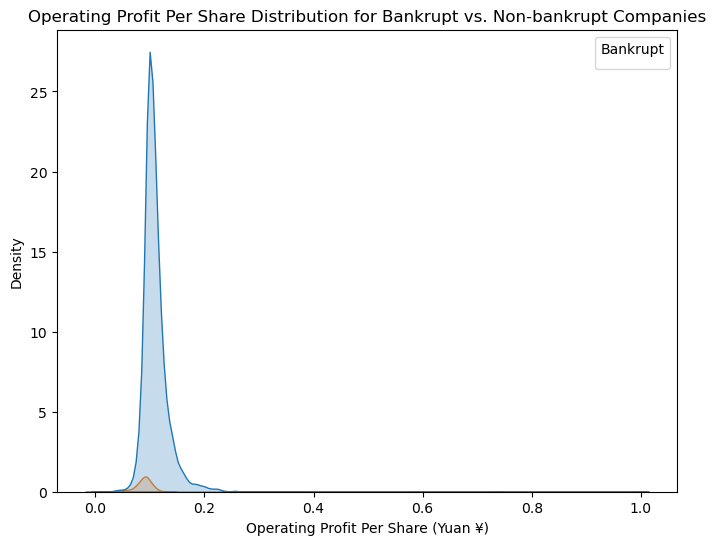

In [56]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df, x='Operating Profit Per Share (Yuan ¥)', hue='Bankrupt', fill=True)
plt.title('Operating Profit Per Share Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Operating Profit Per Share (Yuan ¥)')
plt.ylabel('Density')
plt.legend(title='Bankrupt')
plt.show()

#### 2.Difference in "Net Value Per Share (C)" between bankrupt and non-bankrupt companies

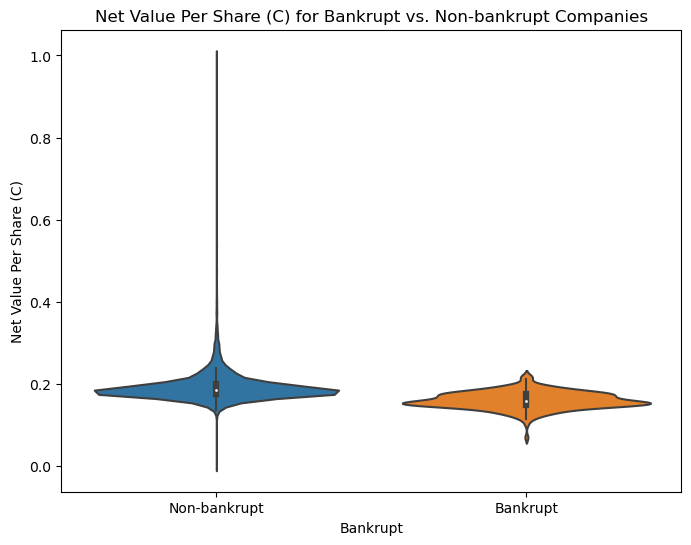

In [58]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt', y='Net Value Per Share (C)', data=df)
plt.title('Net Value Per Share (C) for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Net Value Per Share (C)')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

#### 3.Distributions of "Total Asset Growth Rate" for bankrupt vs. non-bankrupt companies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


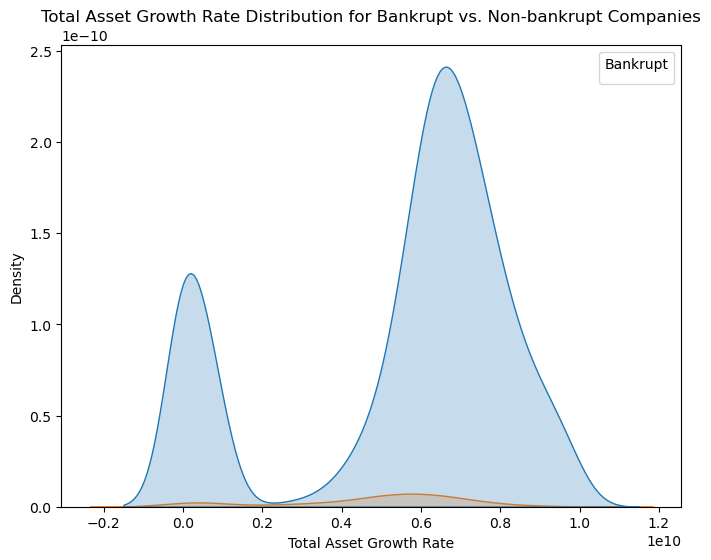

In [61]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Total Asset Growth Rate', hue='Bankrupt', fill=True)
plt.title('Total Asset Growth Rate Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Total Asset Growth Rate')
plt.ylabel('Density')
plt.legend(title='Bankrupt')
plt.show()

#### 4.Comparison of "Liability to Equity" for bankrupt vs. non-bankrupt companies

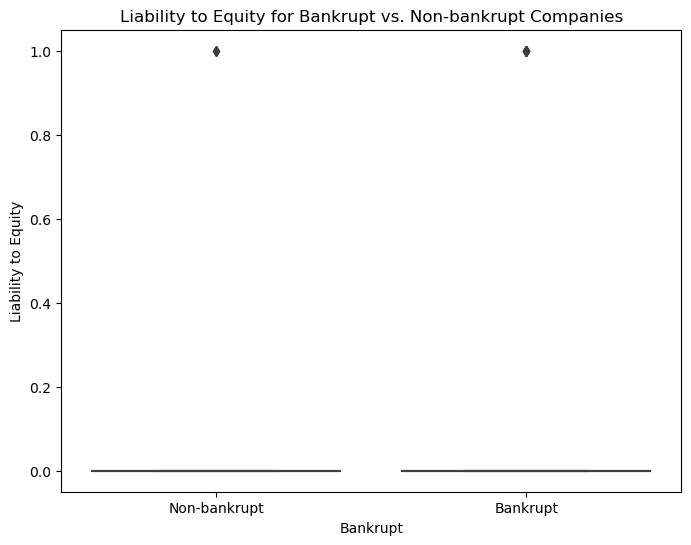

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bankrupt', y='Liability-Assets Flag', data=df)
plt.title('Liability to Equity for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Liability to Equity')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

#### 5.Distribution of "Net Income to Total Assets" for bankrupt vs. non-bankrupt companies

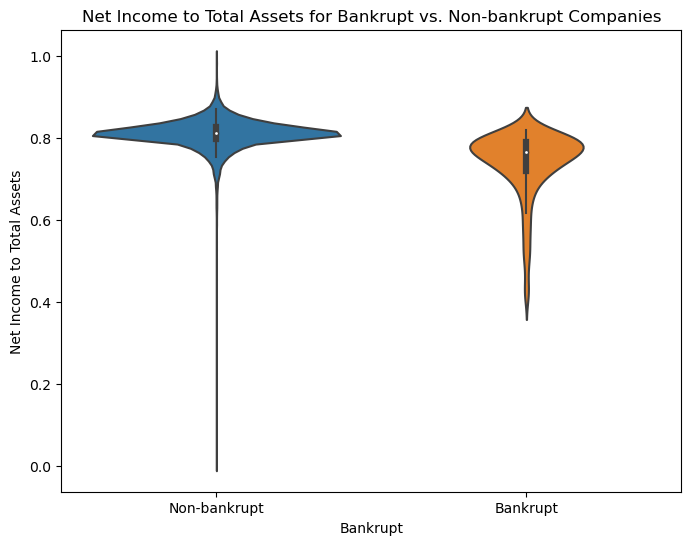

In [66]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt', y='Net Income to Total Assets', data=df)
plt.title('Net Income to Total Assets for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('Bankrupt')
plt.ylabel('Net Income to Total Assets')
plt.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
plt.show()

#### 6.Distribution of "ROA(A) before interest and % after tax" between bankrupt and non-bankrupt companies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


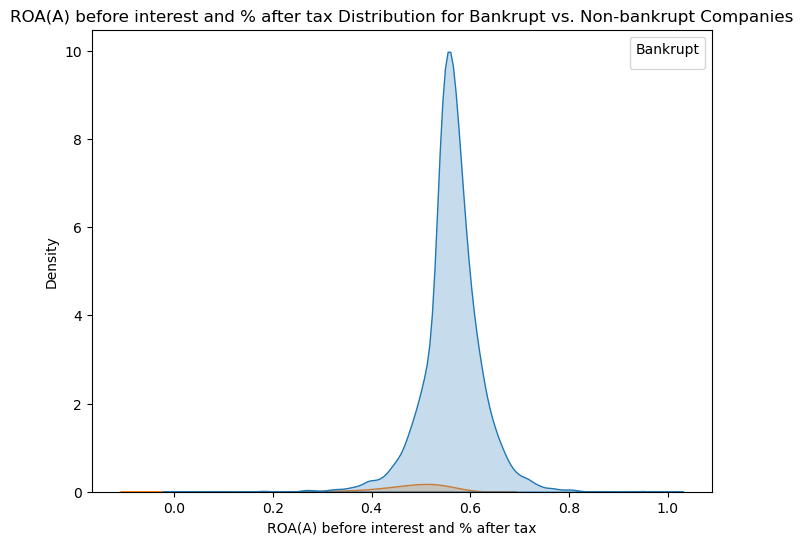

In [69]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='ROA(A) before interest and % after tax', hue='Bankrupt', fill=True)
plt.title('ROA(A) before interest and % after tax Distribution for Bankrupt vs. Non-bankrupt Companies')
plt.xlabel('ROA(A) before interest and % after tax')
plt.ylabel('Density')
plt.legend(title='Bankrupt')
plt.show()

# Correlation Heatmap

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [77]:
correlation_matrix = df.corr()

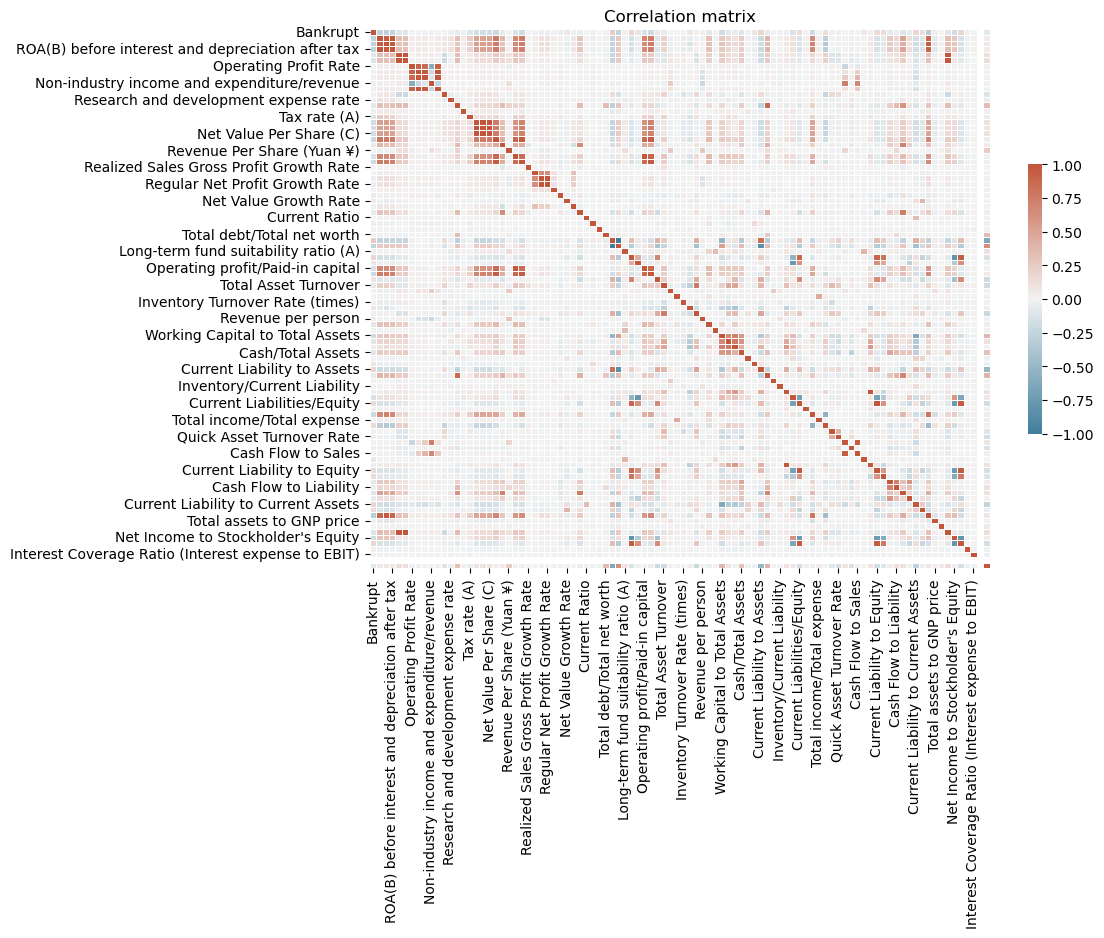

In [81]:
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix,  cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix")
plt.show()

Observations : Strong correlation is found b/w feature, but this is expected. We can see a pattern were we have a common numerator or denominator. Lets retain the features, will take a decision after data analysis step

# Target variable analysis

In [85]:
# Converting Bankrupt column to Categorical
df['Bankrupt'] = df['Bankrupt'].astype(str)

In [87]:
# Calculate counts and percentages
count_df = df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

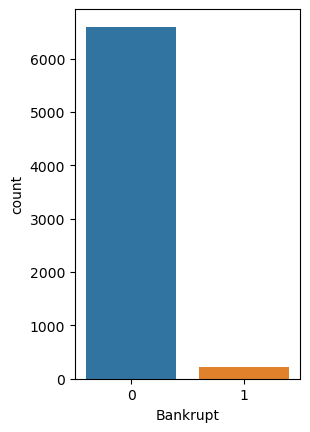

In [89]:
# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=df, order = ["0","1"])

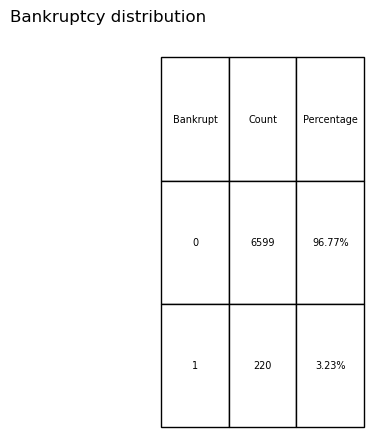

In [91]:
# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution')
plt.show()

# Check The Dataset is Balanced or Imbalanced

In [94]:
bankrupt_count = df['Bankrupt'].value_counts()

In [96]:
print("Class distribution:")
print(bankrupt_count)

Class distribution:
0    6599
1     220
Name: Bankrupt, dtype: int64


In [98]:
# Calculate the imbalance ratio
imbalance_ratio = bankrupt_count.max() / bankrupt_count.min()
print("Imbalance ratio:", imbalance_ratio)

Imbalance ratio: 29.995454545454546


1) An imbalance ratio of ~30:1 is generally too high and requires corrective measures to avoid poor model performance on the minority class.
2) Balancing the dataset, either by resampling or adjusting weights, will usually lead to a more effective and reliable model.

# Preprocessing

First, Let's drop the columns that don't provide any useful information for our predictions

In [103]:
{column:len(df[column].unique()) for column in df.columns }

{'Bankrupt': 2,
 'ROA(C) before interest and depreciation before interest': 3333,
 'ROA(A) before interest and % after tax': 3151,
 'ROA(B) before interest and depreciation after tax': 3160,
 'Operating Gross Margin': 3781,
 'Realized Sales Gross Margin': 3788,
 'Operating Profit Rate': 3376,
 'Pre-tax net Interest Rate': 3789,
 'After-tax net Interest Rate': 3604,
 'Non-industry income and expenditure/revenue': 2551,
 'Continuous interest rate (after tax)': 3617,
 'Operating Expense Rate': 2966,
 'Research and development expense rate': 1536,
 'Cash flow rate': 5557,
 'Interest-bearing debt interest rate': 1080,
 'Tax rate (A)': 2488,
 'Net Value Per Share (B)': 2278,
 'Net Value Per Share (A)': 2285,
 'Net Value Per Share (C)': 2284,
 'Persistent EPS in the Last Four Seasons': 1358,
 'Cash Flow Per Share': 1545,
 'Revenue Per Share (Yuan ¥)': 3807,
 'Operating Profit Per Share (Yuan ¥)': 1236,
 'Per Share Net profit before tax (Yuan ¥)': 1522,
 'Realized Sales Gross Profit Growth Rat

In [105]:
# Dropping irrelevant columns 
df = df.drop(['Net Income Flag'], axis=1)

In [107]:
df

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.19000

# Encoding Categorical Variables

To convert categorical data into numerical, we will use the one-hot encoding technique. This process involves assigning binary numeric values to each unique class present in columns with categorical data. By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and prediction.


In [111]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt_0,Bankrupt_1
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,0,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.3

In [113]:
df_dummies = pd.get_dummies(df)
df_dummies.tail()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt_0,Bankrupt_1
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890,1,0
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+09,0.00

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt                                                 6819 non-null   object 
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

# Splitting the data into x and y

Now, we partition the dataset into two components: x and y. The variable x encompasses all independent variables, representing the features that contribute to our predictions. On the other hand, y encapsulates the dependent variable or target variable, serving as the outcome we aim to predict.

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x= df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

# Train-Test Split

We'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.2.We will take Random State as 42. This will guarantee the reproducibility of our results across different runs.

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [126]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 94)
(1364, 94)
(5455,)
(1364,)


##  Adjust the Undersampling Ratio

To target a specific imbalance ratio, you can modify the undersampling strategy by controlling the sampling_strategy parameter in RandomUnderSampler.

In [131]:
from imblearn.under_sampling import RandomUnderSampler

In [132]:
# Specify the desired ratio (e.g., reduce to 10:1)
target_ratio = 10

In [133]:
# Calculate the sampling strategy for undersampling
if len(y_train[y_train == 0]) > 0:
    sampling_strategy = len(y_train[y_train == 1]) * target_ratio / len(y_train[y_train == 0])

In [134]:
# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

In [135]:
# Apply undersampling
x_res, y_res = undersampler.fit_resample(x_train, y_train)

In [141]:
# Check class distribution after undersampling
print("Class distribution after undersampling:")
print(y_res.value_counts())

Class distribution after undersampling:
0    169
1    169
Name: Bankrupt, dtype: int64


# Standard Scaler

We will now use Standard Scaler to standardize the features of the dataset. This ensures that the consistency between the features of the dataset is maintained. Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features.

In [145]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [149]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [151]:
x_train

array([[-0.11702908, -0.24729279, -0.1523761 , ..., -0.02208387,
         0.10860704, -0.49725421],
       [ 0.01547354,  0.04891765,  0.0780552 , ..., -0.04486452,
         0.00589797, -0.41533037],
       [ 0.05139292,  0.02900434,  0.01048512, ..., -0.04366009,
         0.01312865, -0.12205347],
       ...,
       [ 0.02664846,  0.04725821,  0.04773529, ..., -0.03898412,
         0.03883393, -0.36039024],
       [ 1.23912724,  1.29847768,  1.28911894, ..., -0.04736729,
        -0.01003481,  0.2074778 ],
       [ 1.19362935,  1.04541273,  0.91055324, ..., -0.04779964,
        -0.01291977,  0.05666213]])

In [153]:
x_test

array([[-1.16587511, -1.18487768, -0.89478069, ..., -0.04788727,
        -0.01350949,  0.78069016],
       [ 0.60375324,  0.18748108,  0.59262735, ..., -0.04136492,
         0.0261918 , -0.37890667],
       [ 1.29739646,  1.10100405,  1.0197049 , ..., -0.04783469,
        -0.01315546,  0.02216067],
       ...,
       [-0.29263496, -0.34354045, -0.18616114, ...,  0.28821412,
         0.33372151, -0.55200802],
       [-0.92641254, -0.67874778, -0.87658875, ..., -0.04890727,
        -0.02050086, -0.58683096],
       [ 0.75541286,  0.72679982,  0.9633965 , ..., -0.04783241,
        -0.0131401 ,  0.12287622]])

# Addressing the issue of Data Imbalance

1) We have data imbalance within our target variable. Initially, we will evaluate our model's accuracy in the presence of this imbalance.
2) Then, to rectify the issue of imbalance, we implement the Synthetic Minority Over-sampling Technique (SMOTE) as an oversampling method.
3) We will then compare the model accuracies before and after addressing the data imbalance using SMOTE, providing valuable insights into the impact of this preprocessing technique.

# Machine Learning Model

#### 1. Logistic Regression (Logit)

In [157]:
from sklearn.linear_model import LogisticRegression

In [159]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [161]:
logit_model = LogisticRegression()

In [163]:
logit_model.fit(x_train, y_train)

LogisticRegression()

In [165]:
y_pred = logit_model.predict(x_test)

In [167]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9640762463343109
Confusion Matrix:
 [[1305    8]
 [  41   10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.56      0.20      0.29        51

    accuracy                           0.96      1364
   macro avg       0.76      0.59      0.64      1364
weighted avg       0.95      0.96      0.96      1364



#### 2.Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [191]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [193]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [195]:
y_pred = rf_model.predict(x_test)

In [197]:
#y_pred = y_pred.astype(int)

Data Type Mismatch: n your case, the model predictions (y_pred) were in string format (e.g., '0' and '1'), while the actual labels in y_test were integers (e.g., 0 and 1). Many evaluation functions in scikit-learn, like accuracy_score and classification_report, require the predicted and true labels to be of the same data type. If they are not, it raises a TypeError, as you've encountered.

In [200]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9655425219941349
Confusion Matrix:
 [[1311    2]
 [  45    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.75      0.12      0.20        51

    accuracy                           0.97      1364
   macro avg       0.86      0.56      0.59      1364
weighted avg       0.96      0.97      0.95      1364



#### 3.Support Vector Machine (SVM)

In [203]:
from sklearn.svm import SVC

In [205]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [207]:
svm_model = SVC(kernel='linear', probability=True)

In [209]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [210]:
y_pred = svm_model.predict(x_test)

In [213]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9640762463343109
Confusion Matrix:
 [[1313    0]
 [  49    2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.04      0.08        51

    accuracy                           0.96      1364
   macro avg       0.98      0.52      0.53      1364
weighted avg       0.97      0.96      0.95      1364



#### 4.Gradient Boosting (XGBoost)

In [216]:
from xgboost import XGBClassifier

In [217]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [218]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [222]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

You need to ensure that the target variable (y) is encoded as integers, not as strings. This can be fixed by converting y_train and y_test to integer type.

In [225]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [226]:
y_pred = xgb_model.predict(x_test)

In [229]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9633431085043989
Confusion Matrix:
 [[1304    9]
 [  41   10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.53      0.20      0.29        51

    accuracy                           0.96      1364
   macro avg       0.75      0.59      0.63      1364
weighted avg       0.95      0.96      0.96      1364



#### 5.Neural Network (MLP)

In [232]:
from sklearn.neural_network import MLPClassifier

In [234]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [236]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42) 

In [238]:
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [239]:
y_pred = mlp_model.predict(x_test)

In [240]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9472140762463344
Confusion Matrix:
 [[1275   38]
 [  34   17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.31      0.33      0.32        51

    accuracy                           0.95      1364
   macro avg       0.64      0.65      0.65      1364
weighted avg       0.95      0.95      0.95      1364



# Hyperparameter Tuning using GridSearchCV

#### 1.Logistic Regression (Logit) using Hyperparameter Tuning

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [312]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'C': [0.1, 1.0, 10.0],                         # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],       # Optimization algorithms
    'max_iter': [100, 200, 500]                     # Maximum iterations
}

In [314]:
# Set up GridSearchCV to search for best parameters
grid_search = GridSearchCV(estimator=logit_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [316]:
# Fit the model with GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [318]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [320]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [322]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9648093841642229
Confusion Matrix:
 [[1310    3]
 [  45    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.67      0.12      0.20        51

    accuracy                           0.96      1364
   macro avg       0.82      0.56      0.59      1364
weighted avg       0.96      0.96      0.95      1364



#### 2. Random Forest using Hyperparameter Tuning

In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [335]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

In [337]:
# Set up GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [339]:
# Fit the model using GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [341]:
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [343]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [345]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.967008797653959
Confusion Matrix:
 [[1313    0]
 [  45    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       1.00      0.12      0.21        51

    accuracy                           0.97      1364
   macro avg       0.98      0.56      0.60      1364
weighted avg       0.97      0.97      0.95      1364



#### 3.Neural Network (MLP) with Hyperparameter Tuning


In [251]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [253]:
param_grid = {
    'hidden_layer_sizes': [(10, 10), (20,)],
    'max_iter': [100, 200],  # Replace 'epochs' with 'max_iter'
    'batch_size': [10, 20]
}

In [255]:
# Set up GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [257]:
# Fit the model using GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'batch_size': [10, 20],
                         'hidden_layer_sizes': [(10, 10), (20,)],
                         'max_iter': [100, 200]},
             scoring='accuracy', verbose=1)

In [259]:
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'batch_size': 20, 'hidden_layer_sizes': (20,), 'max_iter': 100}


In [261]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [263]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9604105571847508
Confusion Matrix:
 [[1293   20]
 [  34   17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1313
           1       0.46      0.33      0.39        51

    accuracy                           0.96      1364
   macro avg       0.72      0.66      0.68      1364
weighted avg       0.96      0.96      0.96      1364



I selected random algorithms in machine learning models to evaluate their accuracy and confusion matrix before parameter tuning. The algorithms I chose are Logistic Regression, Random Forest, SVM, Gradient Boosting (XGBoost), and Neural Networks (MLP). Among these, Neural Networks performed the best, working fine and showing good results even before tuning.

# Voting Classifier Using the Best-Performing Models

A Voting Classifier is an ensemble model that combines the predictions from multiple machine learning algorithms to improve performance. You can combine several base models (classifiers), and the ensemble can use either hard voting (majority class prediction) or soft voting (average of predicted probabilities).

In [277]:
from sklearn.ensemble import  VotingClassifier

In [279]:
# Define individual models
logit = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True)  # Probability=True to use predict_proba
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)

In [281]:
# Create a Voting Classifier with the above models
voting_clf = VotingClassifier(
    estimators=[('logit', logit), ('rf', rf), ('svm', svm), ('xgb', xgb), ('nn', nn)],
    voting='soft'  # Soft voting to consider predicted probabilities
)

In [283]:
# Train the Voting Classifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('logit', LogisticRegression(max_iter=200)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categor...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(50,),
                                            max_iter=500))],
                 voting='soft')

In [285]:
# Make predictions on the test set
y_pred = voting_clf.predict(x_test)

In [287]:
# Evaluate the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Voting Classifier: {accuracy:.2f}')

Accuracy of Voting Classifier: 0.97


# Conclusion

In this experiment, I selected various machine learning algorithms—Logistic Regression, Random Forest, SVM, Gradient Boosting (XGBoost), and Neural Networks (MLP)—to evaluate their accuracy and confusion matrix.I  this experiment Compare the All Models Nerual Network(MLP) is performing well.

In the Voting Classifier, the combined model achieved an accuracy of 97% when comparing the performance of all individual models.